# Problem Statement

According to the UN-WHO Road Accidents is the second major cause of deaths in the Emirates and this rate is increasing at a rapid speed with every passing year. A survey by the WHO conducted on UAE Road Accidents shows that 63% of children deaths occurred in road accidents. UAE has a modern and state of the art roads and traffic infrastructure, but there are many other factors involved in the rapidly increasing number of road accidents. Dubai government takes immense efforts to ensure the happiness of its residents and the quality of travel is one of the key indicators.


# Data

Middlesex InsightsX Lab: Applied Data Analytics (https://www.mdx.ac.ae/insightsx-lab) is the Data Science hub to connect the analytics community and academic fraternity with organizations willing to derive insights from their data. The lab enables academic researchers and the data science community in the UAE to help companies understand how to better monetize their data through the development and application of new predictive models and analytical approaches. Several datasets have been put together and curated for use by the data science researches in UAE.

## Description of dataset1: 

This particular data set has been sourced from  an organisation called Bayanat (https://data.bayanat.ae/) which hosts several data sets related to government or public entities in Dubai. A traffic incidents data set for the year 2017 could be obtained and has been used in this analysis

Each row is an incident of the 2017 accident case and columns are the attributes related to the accident. Some fields are in Arabic, but the English one could be downloaded. Very important details like accident location, weather, seatbelt, intoxication, and others are shared for each accident.

Link: www.bit.ly/mdxtrafficdata1 (Data File) Related (Source): http://data.bayanat.ae/en_GB/dataset/traffic-accidents

## Description of dataset2: 

This particular data set has been sourced from  an organisation called Dubai Pulse (https://www.dubaipulse.gov.ae/) which hosts several data sets related to governament or public entities in Dubai. 

It is a data set related to the traffic accidents since August 2018 in Dubai. The best part about this data set is that the data is getting constantly updated by Dubai Police. Which can give us an opportunity to verify the preventive actions taken based on our findings.

For each accident: Unique Accident ID, accident Time, name of the person involved, accident place coordinates are provided.

Link: http://bit.ly/2qjZGmw (Data) Related: https://www.dubaipulse.gov.ae/data/dp-traffic/dp_traffic_incidents-open?organisation=dubai-police&service=dp-traffic

## Foursquare data
Foursquare data can be used to identify the top venues around which accidents occur. This can be strategically used by law enforcement for strengthening patrolling, surveillance and establishing emergency responder hubs


# Objective

The above data sets are rich and can be used to answer many questions from a Data Science perspective. For the purpose of this project, we will scope the analysis under following headings.



## Scope
1.	What are the major causes of accidents in Dubai?
2.	Are there locations that are more accident prone than others?
3.	Can emergency responder hubs be established at strategic locations to improve response time once a distress call is placed after an accident?


In [317]:
#Importing required libraries and packages

import pandas as pd
import numpy as np

import requests

import json # library to handle JSON files


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.extra.rate_limiter import RateLimiter

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


import folium # map rendering library

from googletrans import Translator

import time
from tqdm import tqdm

import sys


import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
import csv


## Data Wrangling


## Traffic Accidents Data Set
A look at the data set provides insight into the information contained. There are several important attributes like Location, cause of accident, Age of driver, year of obtaining driver's license and gender of driver.

In the original data set, many fields were in Arabic. This could easily be translated by uploading in Google Sheets and using the GoogleTranslate() function. Alternately I have also explored the possibility of using googletrans API. However this proved to be more cumbersome due to the timeouts that frequently occur even with throttled requests.

In [318]:
# Reading the data into pandas dataframe
dubai_traffic_accidents_df = pd.read_excel("Traffic_accidents.xlsx")
# Reading the data into pandas dataframe
dubai_traffic_accidents_df.head()


,id,psn_id,record_status,acd_date,acd_time,acd_location_ar,acd_location_en,acd_type_ar,acd_type_en,acd_cause,...,occupation_ar,occupation_en,intoxication_ar,intoxication_en,seat_belt_status_ar,seat_belt_status_en,year_manufactured,insurance_company_name,loading_date,ingestion_id
0,2236089,4188137,N,2017-01-01 00:00:00,23:15:00,NaN,NaN,دهس,Run over,الدخول في الشارع قبل التأكد من خلوه,...,كهربائى الات كهربائية,Electric circuit machines,لم يفحص,Has not examined,مستخدم,user,2014.0,العربية الإسكندنافية للتأمين,20171113,4271
1,2246821,4206891,N,2017-01-01 00:00:00,05:30:00,شارع الخيل,Horse Street,صدم لوحة إرشادية,Run over,القيادة تحت تأثير المسكرات,...,طالب,Student,سكران,drunk,مستخدم,user,2012.0,ادمجى انشورنس كومبانى ليمتد,20171113,4271
2,2235511,4187166,N,2017-01-01 00:00:00,10:30:00,شارع الخيل الاول,Horse Street first,صدم رصيف,Shocked panel guidelines,الانحراف المفاجئ,...,مدير مبيعات,Sales Manager,سكران,drunk,غير معروف,unknown,2011.0,رويال أند سن الينس للتأمين الشرق الاوسط,20171113,4271
3,2261726,4232626,N,2017-01-01 00:00:00,01:30:00,شارع المرسى,Marina Street,صدم - مركبة,Shocked pier,عدم ترك مسافة كافية,...,NaN,NaN,متعاطي للكحول,Abusers of alcohol,غير معروف,unknown,2008.0,التامين الايرانية,20171113,4271
4,2238517,4192374,N,2017-01-01 00:00:00,04:04:00,جزيرة النخلة,Palm Island,دهس,Shocked - vehicle,السرعة الزائدة,...,مدير مبيعات,Sales Manager,غير معروف,unknown,غير معروف,unknown,2015.0,الصقر الوطنية للتأمين,20171113,4271


Data Inspection : Lets take a look at the main features of the data that is available

In [319]:
# Size of data frame
dubai_traffic_accidents_df.shape


(1987, 29)

In [320]:
# Datatypes
dubai_traffic_accidents_df.dtypes

id                              int64
psn_id                          int64
record_status                  object
acd_date                       object
acd_time                       object
acd_location_ar                object
acd_location_en                object
acd_type_ar                    object
acd_type_en                    object
acd_cause                      object
acd_cause_en                   object
weather_ar                     object
weather_en                     object
road_status_ar                 object
road_status_en                 object
age                           float64
gender                         object
injury_severities              object
driving_license_issue_date     object
occupation_ar                  object
occupation_en                  object
intoxication_ar                object
intoxication_en                object
seat_belt_status_ar            object
seat_belt_status_en            object
year_manufactured             float64
insurance_co

In [321]:
# Statistical Summary
dubai_traffic_accidents_df.describe()


,id,psn_id,age,year_manufactured,loading_date,ingestion_id
count,1.987000e+03,1.987000e+03,1821.000000,1963.000000,1987.0,1987.0
mean,2.310154e+06,4.315033e+06,33.333333,2010.290372,20171113.0,4271.0
std,4.003737e+04,6.815571e+04,9.685399,20.994714,0.0,0.0
min,2.233656e+06,4.183905e+06,13.000000,1111.000000,20171113.0,4271.0
25%,2.275644e+06,4.256412e+06,26.000000,2008.000000,20171113.0,4271.0
50%,2.310211e+06,4.315264e+06,31.000000,2013.000000,20171113.0,4271.0
75%,2.343892e+06,4.372250e+06,38.000000,2015.000000,20171113.0,4271.0
max,2.376861e+06,4.428501e+06,80.000000,2018.000000,20171113.0,4271.0


In [322]:
# Summary
dubai_traffic_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 29 columns):
id                            1987 non-null int64
psn_id                        1987 non-null int64
record_status                 1987 non-null object
acd_date                      1987 non-null object
acd_time                      1987 non-null object
acd_location_ar               1930 non-null object
acd_location_en               1930 non-null object
acd_type_ar                   1987 non-null object
acd_type_en                   1987 non-null object
acd_cause                     1987 non-null object
acd_cause_en                  1987 non-null object
weather_ar                    1987 non-null object
weather_en                    1987 non-null object
road_status_ar                1987 non-null object
road_status_en                1987 non-null object
age                           1821 non-null float64
gender                        1832 non-null object
injury_severities          

We can see that the relevant fields like age, gender has some missing values.

On observation it has been found that attribute like occupation is not standardised enough to provide insights. 
Will be dropping all columns that have arabic text and those that do not provide any significant insights

Data Cleansing steps carried out:
1. Drop all  rows containing arabic text or attributes that are not sufficient or significant for analysis
2. Drop all rows that does not have an accident 
3. Replacing missing age values with average age
4. Drop rows for which gender data is missing.
5. Convert accident time to date time format

In [323]:
#Drop all  rows containing arabic text or attributes that are not sufficient or significant for analysis
dubai_traffic_accidents_df.drop(['acd_location_ar', 
                                        'acd_type_ar', 
                                        'acd_cause', 
                                        'weather_ar',
                                        'weather_en' ,
                                        'road_status_ar' ,
                                        'road_status_en',
                                        'occupation_ar' ,
                                        'occupation_en',
                                        'seat_belt_status_ar',
                                        'seat_belt_status_en',
                                        'intoxication_ar',
                                        'insurance_company_name',
                                        'loading_date',
                                        'ingestion_id',
                                        'injury_severities'],
                                axis = 1,
                                inplace=True)
print(dubai_traffic_accidents_df.shape)


(1987, 13)


In [324]:
#Drop all rows that does not have an accident location
dubai_traffic_accidents_df.dropna(subset=['acd_location_en'],inplace=True)
print(dubai_traffic_accidents_df.shape)

(1930, 13)


In [325]:
#Replacing missing age values with average age
avg_age = round(dubai_traffic_accidents_df["age"].mean(axis=0))
print("Average age of accident causing drivers:", avg_age)
dubai_traffic_accidents_df["age"].replace(np.nan, avg_age, inplace=True)

Average age of accident causing drivers: 33


In [326]:
#Drop rows for which gender data is missing.

dubai_traffic_accidents_df.dropna(subset=["gender"], axis=0, inplace=True)

# reset index, because we droped two rows
dubai_traffic_accidents_df.reset_index(drop=True, inplace=True)

In [327]:
#Convert accident time to date time format
#dubai_traffic_accidents_df['acd_date'].apply(pd.datetime)
dubai_traffic_accidents_df['acd_date'] = dubai_traffic_accidents_df['acd_date'].astype('datetime64[ns]') 
#dubai_traffic_accidents_df['acd_time'] = dubai_traffic_accidents_df['acd_time'].astype('datetime64[ns]')
dubai_traffic_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 13 columns):
id                            1779 non-null int64
psn_id                        1779 non-null int64
record_status                 1779 non-null object
acd_date                      1779 non-null datetime64[ns]
acd_time                      1779 non-null object
acd_location_en               1779 non-null object
acd_type_en                   1779 non-null object
acd_cause_en                  1779 non-null object
age                           1779 non-null float64
gender                        1779 non-null object
driving_license_issue_date    1543 non-null object
intoxication_en               1779 non-null object
year_manufactured             1760 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 180.8+ KB


The final data frame after all the data cleanup activities

In [328]:
dubai_traffic_accidents_df.head()

,id,psn_id,record_status,acd_date,acd_time,acd_location_en,acd_type_en,acd_cause_en,age,gender,driving_license_issue_date,intoxication_en,year_manufactured
0,2246821,4206891,N,2017-01-01,05:30:00,Horse Street,Run over,Driving under the influence of alcohol,28.0,F,2011-04-05 00:00:00,drunk,2012.0
1,2235511,4187166,N,2017-01-01,10:30:00,Horse Street first,Shocked panel guidelines,Sudden deviation,30.0,F,31-10-11,drunk,2011.0
2,2261726,4232626,N,2017-01-01,01:30:00,Marina Street,Shocked pier,Not leaving enough distance,33.0,F,2012-12-03 00:00:00,Abusers of alcohol,2008.0
3,2238517,4192374,N,2017-01-01,04:04:00,Palm Island,Shocked - vehicle,Overspeed,39.0,M,2008-04-11 00:00:00,unknown,2015.0
4,2244942,4203592,N,2017-01-01,17:20:00,Jumeirah Street,Run over,Not leaving enough distance,28.0,M,25-04-07,Has not examined,2012.0


In [329]:
dubai_traffic_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 13 columns):
id                            1779 non-null int64
psn_id                        1779 non-null int64
record_status                 1779 non-null object
acd_date                      1779 non-null datetime64[ns]
acd_time                      1779 non-null object
acd_location_en               1779 non-null object
acd_type_en                   1779 non-null object
acd_cause_en                  1779 non-null object
age                           1779 non-null float64
gender                        1779 non-null object
driving_license_issue_date    1543 non-null object
intoxication_en               1779 non-null object
year_manufactured             1760 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 180.8+ KB


In [330]:
#df1 = dubai_traffic_accidents_df.groupby("acd_cause_en")["gender"].value_counts()
#df2 = df1.pivot ['acd_cause_en']

## Traffic Incidents Data Set

This data set has information on accident ID, latitude and longitude of incident accident time.

It is important to note that there are certain latitude, longitude values that have been assigned as 0.0. Also there are a few latitude, longitude values that point to locations outside UAE. These are outliers and can distort the results, hence to be removed from the dataset.

Below Data Cleansing steps were carried out to clean up the data frame.
1. Convert the latitude and longitude values to float data type
2. Remove rows containing latitide/longitude values that are outside the bounding coordinates for UAE - 51.5795186705, 3. .4969475367, 56.3968473651, 26.055464179
3. Drop all rows that does not have a latitide/longitude detail.

In [331]:
# Reading the data into pandas dataframe
dubai_traffic_incidents_df = pd.read_csv("Traffic_incidents.csv")
# Convert the latitude and longitude values to float data type
dubai_traffic_incidents_df.head()
dubai_traffic_incidents_df['acci_x'] = dubai_traffic_incidents_df['acci_x'].astype('float') 
dubai_traffic_incidents_df['acci_y'] = dubai_traffic_incidents_df['acci_y'].astype('float')


dubai_traffic_incidents_df.dtypes

acci_id        int64
acci_time     object
acci_x       float64
acci_y       float64
dtype: object

In [332]:
#Remove rows containing latitide/longitude values that are outside the bounding coordinates for UAE - 51.5795186705, 22.4969475367, 56.3968473651, 26.055464179
dubai_traffic_incidents_df.loc[(dubai_traffic_incidents_df['acci_x'] > 26.055464179) | (dubai_traffic_incidents_df['acci_x'] < 22.4969475367), 'acci_x'] = 0
dubai_traffic_incidents_df.loc[(dubai_traffic_incidents_df['acci_y'] > 56.3968473651) | (dubai_traffic_incidents_df['acci_y'] < 51.5795186705), 'acci_x'] = 0

#Replace cells that contain 0.0 for latitude/longitude with np.NaN
dubai_traffic_incidents_df['acci_x'].replace(0, np.NaN,inplace=True)
dubai_traffic_incidents_df['acci_y'].replace(0, np.NaN,inplace=True)

dubai_traffic_incidents_df.dropna(subset=['acci_x', 'acci_y'],inplace=True)
print(dubai_traffic_incidents_df.shape)

(50798, 4)


In [333]:
#Drop all rows that does not have a latitide/longitude detail.
dubai_traffic_incidents_df.dropna(subset=['acci_x', 'acci_y'],inplace=True)
print(dubai_traffic_incidents_df.shape)

(50798, 4)


In [334]:
dubai_traffic_incidents_df.describe()

,acci_id,acci_x,acci_y
count,5.079800e+04,50798.000000,50798.000000
mean,3.556473e+09,25.153239,55.292806
std,2.742219e+07,0.101134,0.119600
min,3.499715e+09,24.352072,53.965209
25%,3.534941e+09,25.086376,55.213191
50%,3.555054e+09,25.174460,55.290920
75%,3.580244e+09,25.234128,55.372204
max,3.604635e+09,25.325116,56.201701


In [335]:
dubai_traffic_incidents_df.head()

,acci_id,acci_time,acci_x,acci_y
0,3604606157,12/2/2020 17:41,25.196862,55.236393
1,3604606714,12/2/2020 17:43,25.222217,55.353533
2,3604610155,12/2/2020 17:51,25.264624,55.432407
3,3604615723,12/2/2020 18:04,24.905104,55.081115
4,3604624754,12/2/2020 18:23,25.053016,55.182270


In [336]:
dubai_traffic_incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50798 entries, 0 to 51594
Data columns (total 4 columns):
acci_id      50798 non-null int64
acci_time    50798 non-null object
acci_x       50798 non-null float64
acci_y       50798 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ MB


# Data Analysis

## Top 10 Causes of Accidents

In [337]:
accident_causes_df = dubai_traffic_accidents_df['acd_cause_en'].value_counts()
accident_causes_df

Driving under the influence of alcohol                          419
Not leaving enough distance                                     384
Sudden deviation                                                350
Lack of appreciation for road users                             196
Before entering into the street to make sure that it is free     97
Lack of commitment to walk line                                  74
Bypass the red light                                             74
Back to back dangerously                                         50
Neglect and lack of attention                                    48
Overspeed                                                        21
Driving under the influence of drugs                             18
Sir Unlike Sir                                                    9
Wrong rotation                                                    7
Flail animal                                                      6
Frame explosion                                 

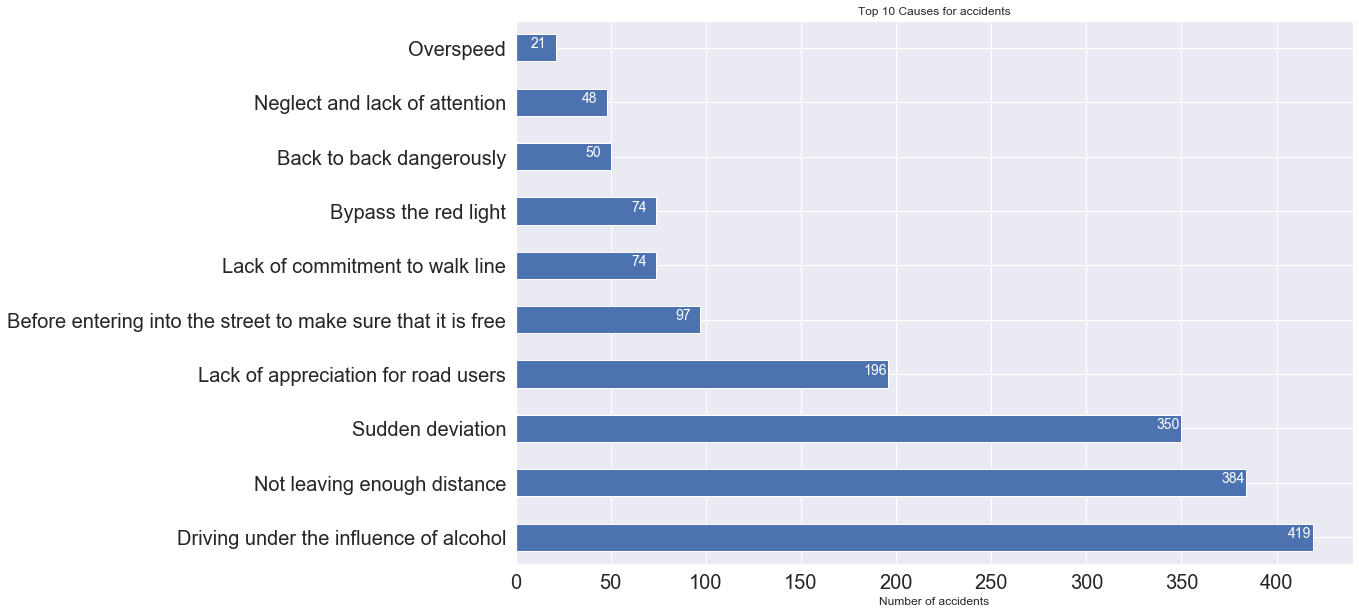

In [338]:
acd_causes_top10 = accident_causes_df.head(10)
pd.DataFrame(acd_causes_top10 )
acd_causes_top10.plot(kind='barh', figsize=(15, 10), fontsize =20) 

plt.xlabel('Number of accidents')
plt.title('Top 10 Causes for accidents')

for index, value in enumerate(acd_causes_top10): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 13 from x to make it fit within the bar)
    plt.annotate(label, xy=(value - 13, index ), color='white', fontsize = 14)

plt.show()

It can be observed that most accidents were due to driving under the influence of alcohol. The second most common reason is not leaving enough distance from the vehicle in front. 

## Top Locations where accidents occur



### Plot the accident locations on a map

In [339]:
X=dubai_traffic_incidents_df.loc[:,['acci_id','acci_x','acci_y']]
X.head(10)

,acci_id,acci_x,acci_y
0,3604606157,25.196862,55.236393
1,3604606714,25.222217,55.353533
2,3604610155,25.264624,55.432407
3,3604615723,24.905104,55.081115
4,3604624754,25.053016,55.182270
5,3604625192,25.214817,55.283317
6,3604626570,25.276898,55.412865
7,3604628025,24.969030,55.147958
8,3604628209,25.236638,55.378262
9,3604629424,25.231834,55.276605


In [340]:
# First let's create a map of Dubai using latitude and longitude values and plot the locations of accidents.

latitude = 25.2048
longitude = 55.2708
map_dubai = folium.Map(location=[latitude, longitude], zoom_start=10)


#Subsetting to 1000 values as map takes a lot of time to load for 50000+ entries

df_traffic_accidents_subset =  dubai_traffic_incidents_df.iloc[0:1000,:]
df_traffic_accidents_subset.is_copy = False

# add markers to map
for lat, lng in zip(df_traffic_accidents_subset['acci_x'], df_traffic_accidents_subset['acci_y']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dubai)  
    
map_dubai

C:\Users\aparnavt\Anaconda3\lib\site-packages\pandas\core\generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\aparnavt\Anaconda3\lib\site-packages\pandas\core\generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


As we can see the there are patterns suggestive of locations which are very accident prone. Let try to cluster the GPS coordinates available

## K Means Clustering on Latitude, Longitude Coordinates

Below we will try to apply K means clustering on the latitude, longitude data. To determine an optimum value for K, will plot an elbow curve.


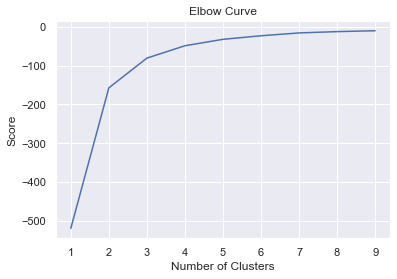

In [341]:

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = dubai_traffic_incidents_df[['acci_x']]
X_axis = dubai_traffic_incidents_df[['acci_y']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

The elbow curve flattens for values above K=9. 

Choosing K=9 for identifying the cluster centres

In [342]:
kmeans = KMeans(n_clusters = 9, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,acci_id,acci_x,acci_y,cluster_label
0,3604606157,25.196862,55.236393,2
1,3604606714,25.222217,55.353533,7
2,3604610155,25.264624,55.432407,0
3,3604615723,24.905104,55.081115,8
4,3604624754,25.053016,55.182270,6
5,3604625192,25.214817,55.283317,2
6,3604626570,25.276898,55.412865,0
7,3604628025,24.969030,55.147958,8
8,3604628209,25.236638,55.378262,0
9,3604629424,25.231834,55.276605,2


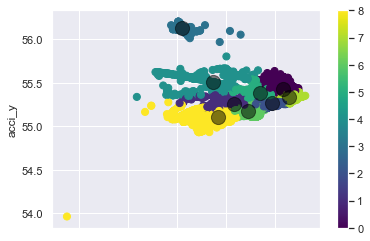

In [343]:
X.plot.scatter(x = 'acci_x', y = 'acci_y', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [344]:
centers
kmeans_centres = pd.DataFrame(centers, columns = ['lat', 'lon'])
kmeans_centres

,lat,lon
0,25.232823,55.429040
1,25.032189,55.259093
2,25.188298,55.264719
3,24.821953,56.123525
4,24.948172,55.504635
5,25.139747,55.385685
6,25.090770,55.178865
7,25.257922,55.331601
8,24.968370,55.105507


In [345]:
latitude = 25.2048
longitude = 55.2708
map_dubai1 = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng in centers:
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dubai1)  
    
map_dubai1

In [346]:
X = X[['acci_id','cluster_label']]
X.head(5)

,acci_id,cluster_label
0,3604606157,2
1,3604606714,7
2,3604610155,0
3,3604615723,8
4,3604624754,6


In [347]:
clustered_data = dubai_traffic_incidents_df.merge(X, left_on='acci_id', right_on='acci_id')
clustered_data.head(5)

,acci_id,acci_time,acci_x,acci_y,cluster_label
0,3604606157,12/2/2020 17:41,25.196862,55.236393,2
1,3604606714,12/2/2020 17:43,25.222217,55.353533,7
2,3604610155,12/2/2020 17:51,25.264624,55.432407,0
3,3604615723,12/2/2020 18:04,24.905104,55.081115,8
4,3604624754,12/2/2020 18:23,25.053016,55.182270,6


## Using Foursquare to identify location names for Cluster Centres

Let us try and identify the names of these locations using Foursquare. 

In [348]:
#Define Foursquare credentials
# filter columns
CLIENT_ID = '0ZTQODSXDWEQYWADGXYIDEN3I3XVJZYEZLUDIEMHMOXU0GRH' # your Foursquare ID
CLIENT_SECRET = 'DUMZXRMGJIIKYSOF4GXT4HKXH5V0Z3JH3BBV113Y35ELLXWZ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0ZTQODSXDWEQYWADGXYIDEN3I3XVJZYEZLUDIEMHMOXU0GRH
CLIENT_SECRET:DUMZXRMGJIIKYSOF4GXT4HKXH5V0Z3JH3BBV113Y35ELLXWZ


In [349]:
#Define a function that obtain nearby venues for a neighborhood 
def getNearbyVenue( latitude, longitude, radius=1000):
    venues_list=[]
    address = None
    
    #print(latitude)
    for lat, lon in zip(latitude, longitude):
    
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, radius, LIMIT)       
        results = requests.get(url).json()
        #print(results)
        nearby_venue = json_normalize(results['response']['venues'][0])
        #print(nearby_venue)
        address = nearby_venue['location.formattedAddress'][0][0]
        #print(address)
        row = [lat ,lon, address]
        venues_list.append(row)

    
    nearby_venues = pd.DataFrame(venues_list, columns = [ 'lat',  'lon', 'Address'])
    #nearby_venues.columns = ['Neighborhood Latitude',  'Neighborhood Longitude', 'Address']
    #print(nearby_venues)
    return(nearby_venues)

In [350]:


Responder_Venues_kmeans = getNearbyVenue( kmeans_centres['lat'],kmeans_centres['lon'],500)                            
Responder_Venues_kmeans.to_csv("Responder_Venues_kmeans.csv")
Responder_Venues_kmeans

,lat,lon,Address
0,25.232823,55.429040,Arabian Center
1,25.032189,55.259093,دبي
2,25.188298,55.264719,"Bay Avenue, Ground Floor (at Al Amal St.)"
3,24.821953,56.123525,Hatta (حتا)
4,24.948172,55.504635,دبي
5,25.139747,55.385685,"Shk Mohd Bin Zd Rd, E 311, after Repton School"
6,25.090770,55.178865,First Al Khail Street (Barsha Heights)
7,25.257922,55.331601,الإمارات العربية المتحدة
8,24.968370,55.105507,دبي


Hence these are the 9 locations around which accidents intensity is centred. These can be ideal location for centralizing law and order operations and emergency response

## DBSCAN

DBSCAN is an alternate clustering algorithm and is supposed to be better performing that K means when it comes to GPS coordinates. If GPS coordinates spill over multiple zones, K means clustering can give erroneous results. DBSCAN on the other hand converts coordinated to radian and uses haversine distances to calculate centroids and can give better results. In the analysis below, DBSCAN is used to produce 77 centroid locations

In [351]:
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
coords = dubai_traffic_incidents_df.as_matrix(columns=['acci_x', 'acci_y'])


C:\Users\aparnavt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [352]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))


Number of clusters: 77


In [353]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)


In [354]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})
rep_points

,lon,lat
0,55.289385,25.155347
1,55.374861,24.987940
2,55.348285,24.862734
3,56.124278,24.819780
4,55.341925,25.027112
...,...,...
72,55.308051,24.859993
73,55.359856,24.800418
74,55.431529,24.899612
75,55.408912,24.763391


In [355]:
rs = rep_points.apply(lambda row: dubai_traffic_incidents_df[(dubai_traffic_incidents_df['acci_x']==row['lat']) & (dubai_traffic_incidents_df['acci_y']==row['lon'])].iloc[0], axis=1)

#rs = rep_points.apply(lambda row: df[(df['lat']==row['lat']) &amp;&amp; (df['lon']==row['lon'])].iloc[0], axis=1)
rs


,acci_id,acci_time,acci_x,acci_y
0,3560624408,9/11/2019 8:40,25.155347,55.289385
1,3579677043,19/12/2019 08:20:19,24.987940,55.374861
2,3540443179,25/09/2019 16:47:30,24.862734,55.348285
3,3585739923,2/1/2020 3:23,24.819780,56.124278
4,3536615152,16/09/2019 15:49:48,25.027112,55.341925
...,...,...,...,...
72,3530518034,2/9/2019 10:43,24.859993,55.308051
73,3526029516,23/08/2019 18:11:50,24.800418,55.359856
74,3519279281,7/8/2019 19:00,24.899612,55.431529
75,3507518689,13/07/2019 10:58:16,24.763391,55.408912


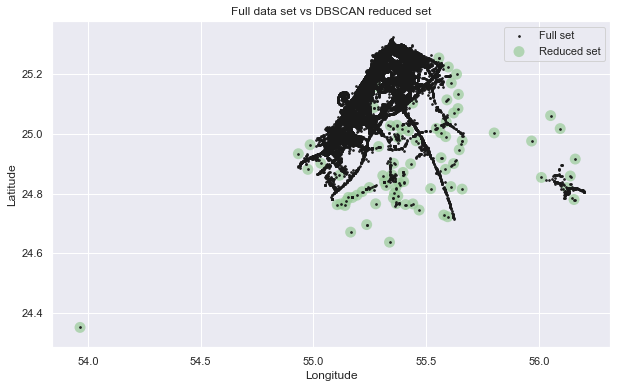

In [356]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['acci_y'], rs['acci_x'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(dubai_traffic_incidents_df['acci_y'], dubai_traffic_incidents_df['acci_x'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [357]:
latitude = 25.2048
longitude = 55.2708
map_dubai3 = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng in zip(rs['acci_x'], rs['acci_y']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dubai3)  
    
map_dubai3

Let us try and obtain the location names of these 81 representative points using geopy reverse. We also need Translator Class in googletrans as a lot of location information is in arabic

In [358]:
rs['latlon'] = rs['acci_x'].astype(str) +','+ rs['acci_y'].astype(str)
rs.to_csv("Representativepoints.csv")

# Conclusion

This project helps provide insights to the driver behavior in UAE and patterns of accidents/incidents. Locations that are more dangerous and which require improved surveillance/monitoring has been identified and adopting measures can improve the overall experience on UAE roads